#                      COMPACT NEURAL NETWORK 

In [29]:
from impl_of_func import *
import numpy as np
import matplotlib.pyplot as plt

IMPORTING MNIST DATASETS

In [30]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(r'./MNIST',one_hot=True)

Extracting ./MNIST/train-images-idx3-ubyte.gz
Extracting ./MNIST/train-labels-idx1-ubyte.gz
Extracting ./MNIST/t10k-images-idx3-ubyte.gz
Extracting ./MNIST/t10k-labels-idx1-ubyte.gz


Creating Placeholders and Transforming them for the NeuralNet inputs

In [31]:
NN = NeuralNet([None,784],[None,10])
x_image = tf.reshape(NN.x,[-1,28,28,1])

#         CREATING WHOLE NETWORK USING 'CompactNeuralNetwork' FUNCTION IN JUST ONE LINE

CNN - Convolutional layer,
POOL - Pooling layer,
FC - Fully Connected Layer,
layer_feilds - Parameters required for corresponding layer in layer_type

In [35]:
train,y_preds,cost = NN.CompactNeuralNetwork(x_image,NN.y_true,
                                          hidden_layers=6,
                                          layer_type=['CNN','POOL','CNN','POOL','FC','FC'],
                                          layer_fields=[[[5,5,1,32],[1,1],'SAME'],[[2,2],[2,2],'SAME'],[[5,5,32,64],[1,1],'SAME'],[[2,2],[2,2],'SAME'],[512],[10]],
                                          Optimization='Adam',
                                          learning_rate = 0.01)

TRAINING NEURALNET USING ADAM OPTIMIZER BY BATCH GRADIENT DESCENT  
Output - Accuracy variation with steps

Accuracy at 0:
0.0982
Accuracy at 10:
0.1584
Accuracy at 20:
0.2721
Accuracy at 30:
0.2723
Accuracy at 40:
0.2554
Accuracy at 50:
0.2809
Accuracy at 60:
0.2831
Accuracy at 70:
0.2705
Accuracy at 80:
0.287
Accuracy at 90:
0.2898
Accuracy at 100:
0.2715
Accuracy at 110:
0.2681
Accuracy at 120:
0.2749
Accuracy at 130:
0.2717
Accuracy at 140:
0.2883
Accuracy at 150:
0.2737
Accuracy at 160:
0.2937
Accuracy at 170:
0.2915
Accuracy at 180:
0.2854
Accuracy at 190:
0.293
Accuracy at 200:
0.2886
Accuracy at 210:
0.2766
Accuracy at 220:
0.2884
Accuracy at 230:
0.2915
Accuracy at 240:
0.2882
Accuracy at 250:
0.2873
Accuracy at 260:
0.2926
Accuracy at 270:
0.2926
Accuracy at 280:
0.2873
Accuracy at 290:
0.2944
Accuracy at 300:
0.2976
Accuracy at 310:
0.2979
Accuracy at 320:
0.2871
Accuracy at 330:
0.2887
Accuracy at 340:
0.2923
Accuracy at 350:
0.2925
Accuracy at 360:
0.2946
Accuracy at 370:
0.2974
Accuracy at 380:
0.2951
Accuracy at 390:
0.2935
Accuracy at 400:
0.2867
Accuracy at 410:
0.2882
Accur

0.597
Accuracy at 3340:
0.5934
Accuracy at 3350:
0.5934
Accuracy at 3360:
0.595
Accuracy at 3370:
0.5924
Accuracy at 3380:
0.593
Accuracy at 3390:
0.5929
Accuracy at 3400:
0.5905
Accuracy at 3410:
0.5887
Accuracy at 3420:
0.5924
Accuracy at 3430:
0.5952
Accuracy at 3440:
0.5959
Accuracy at 3450:
0.5961
Accuracy at 3460:
0.5965
Accuracy at 3470:
0.6005
Accuracy at 3480:
0.6033
Accuracy at 3490:
0.5987
Accuracy at 3500:
0.5937
Accuracy at 3510:
0.661
Accuracy at 3520:
0.6652
Accuracy at 3530:
0.6879
Accuracy at 3540:
0.6841
Accuracy at 3550:
0.6891
Accuracy at 3560:
0.6793
Accuracy at 3570:
0.68
Accuracy at 3580:
0.6734
Accuracy at 3590:
0.677
Accuracy at 3600:
0.6772
Accuracy at 3610:
0.6727
Accuracy at 3620:
0.6783
Accuracy at 3630:
0.6808
Accuracy at 3640:
0.6811
Accuracy at 3650:
0.6885
Accuracy at 3660:
0.6897
Accuracy at 3670:
0.6919
Accuracy at 3680:
0.6811
Accuracy at 3690:
0.6832
Accuracy at 3700:
0.6838
Accuracy at 3710:
0.6896
Accuracy at 3720:
0.6887
Accuracy at 3730:
0.6818


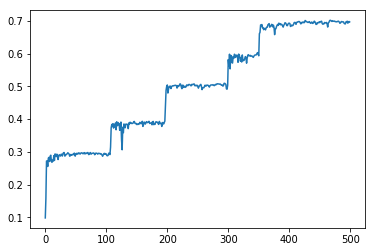

In [33]:
init = tf.global_variables_initializer()
steps = 5000
with tf.Session() as ses:
    
    ses.run(init)
    accs = []
    
    for i in range(steps):
        
        b_x,b_y = mnist.train.next_batch(53)

        
        ses.run(train,feed_dict= {NN.x:b_x,NN.y_true:b_y})
        
        if i%10 == 0:
            
            print("Accuracy at {}:".format(i))
            
            cor = tf.equal(tf.argmax(y_preds,1),tf.argmax(NN.y_true,1))
            
            acc = tf.reduce_mean(tf.cast(cor,tf.float32))
            
            act = (ses.run(acc,feed_dict= {NN.x:mnist.test.images,NN.y_true:mnist.test.labels}))
            
            print(act)
            
            accs.append(act)
            
plt.plot(np.squeeze(accs))
plt.show()
